# 📕 01 - Image Data Ingestion and Label Extraction

---

This notebook serves as a preliminary step in our data processing pipeline, focusing on data ingestion and preliminary visualization. The primary objective is to load images from a structured directory, extract their labels, and visualize a subset to ensure data integrity.

### Directory Structure and Assumptions

Our image loading methodology is built upon a conventional directory structure:

```bash
/dataset_name/class/image.jpg
```


- `dataset_name`: Represents the overarching dataset's name, e.g., "animals".
- `class`: Denotes the specific class or category of the image, e.g., "dog", "cat", or "panda".
- `image.jpg`: The actual image file.

Given this structure, we inherently assume:
1. All datasets are organized in a hierarchical manner on the disk.
2. All images within a specific `class` directory belong to that class. For instance, every image inside the "dog" directory is an example of a dog.

This directory design is a widely accepted standard in the field, ensuring organized and easily accessible datasets.

---

**Note**: This notebook is primarily for prototyping and validation. The finalized, efficient implementations will be transitioned to a dedicated Python library for broader use.



In [1]:
# Importing the necessary packages
import cv2
from pathlib import Path
import numpy as np
from typing import List, Tuple
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def simple_dataset_loader(dataset_path: str) -> Tuple[List[np.array], List[str]]:
    """
    Load images from a dataset path and return a tuple of images and labels.

    Parameters:
    - dataset_path (str): Path to the dataset.

    Returns:
    - Tuple[List[np.array], List[str]]: A tuple containing a list of images and their corresponding labels.
    """
    
    # Lists to store loaded images and their labels
    images = []
    labels = []

    # Convert the generator to a list to get all image paths
    paths = list(Path(dataset_path).glob("*/*"))

    # Iterate over each image path and load the image and label
    for p in tqdm(paths, total=len(paths), desc="Loading images"):
        # Read the image
        image = cv2.imread(str(p))
        if image is None:
            print(f"Warning: Could not read image: {p}")
            continue

        images.append(image)
        labels.append(p.parent.name)

    return images, labels


In [3]:
# Load the images and labels
image_paths, labels = simple_dataset_loader("../data/animals")

  0%|          | 0/3000 [00:00<?, ?it/s]

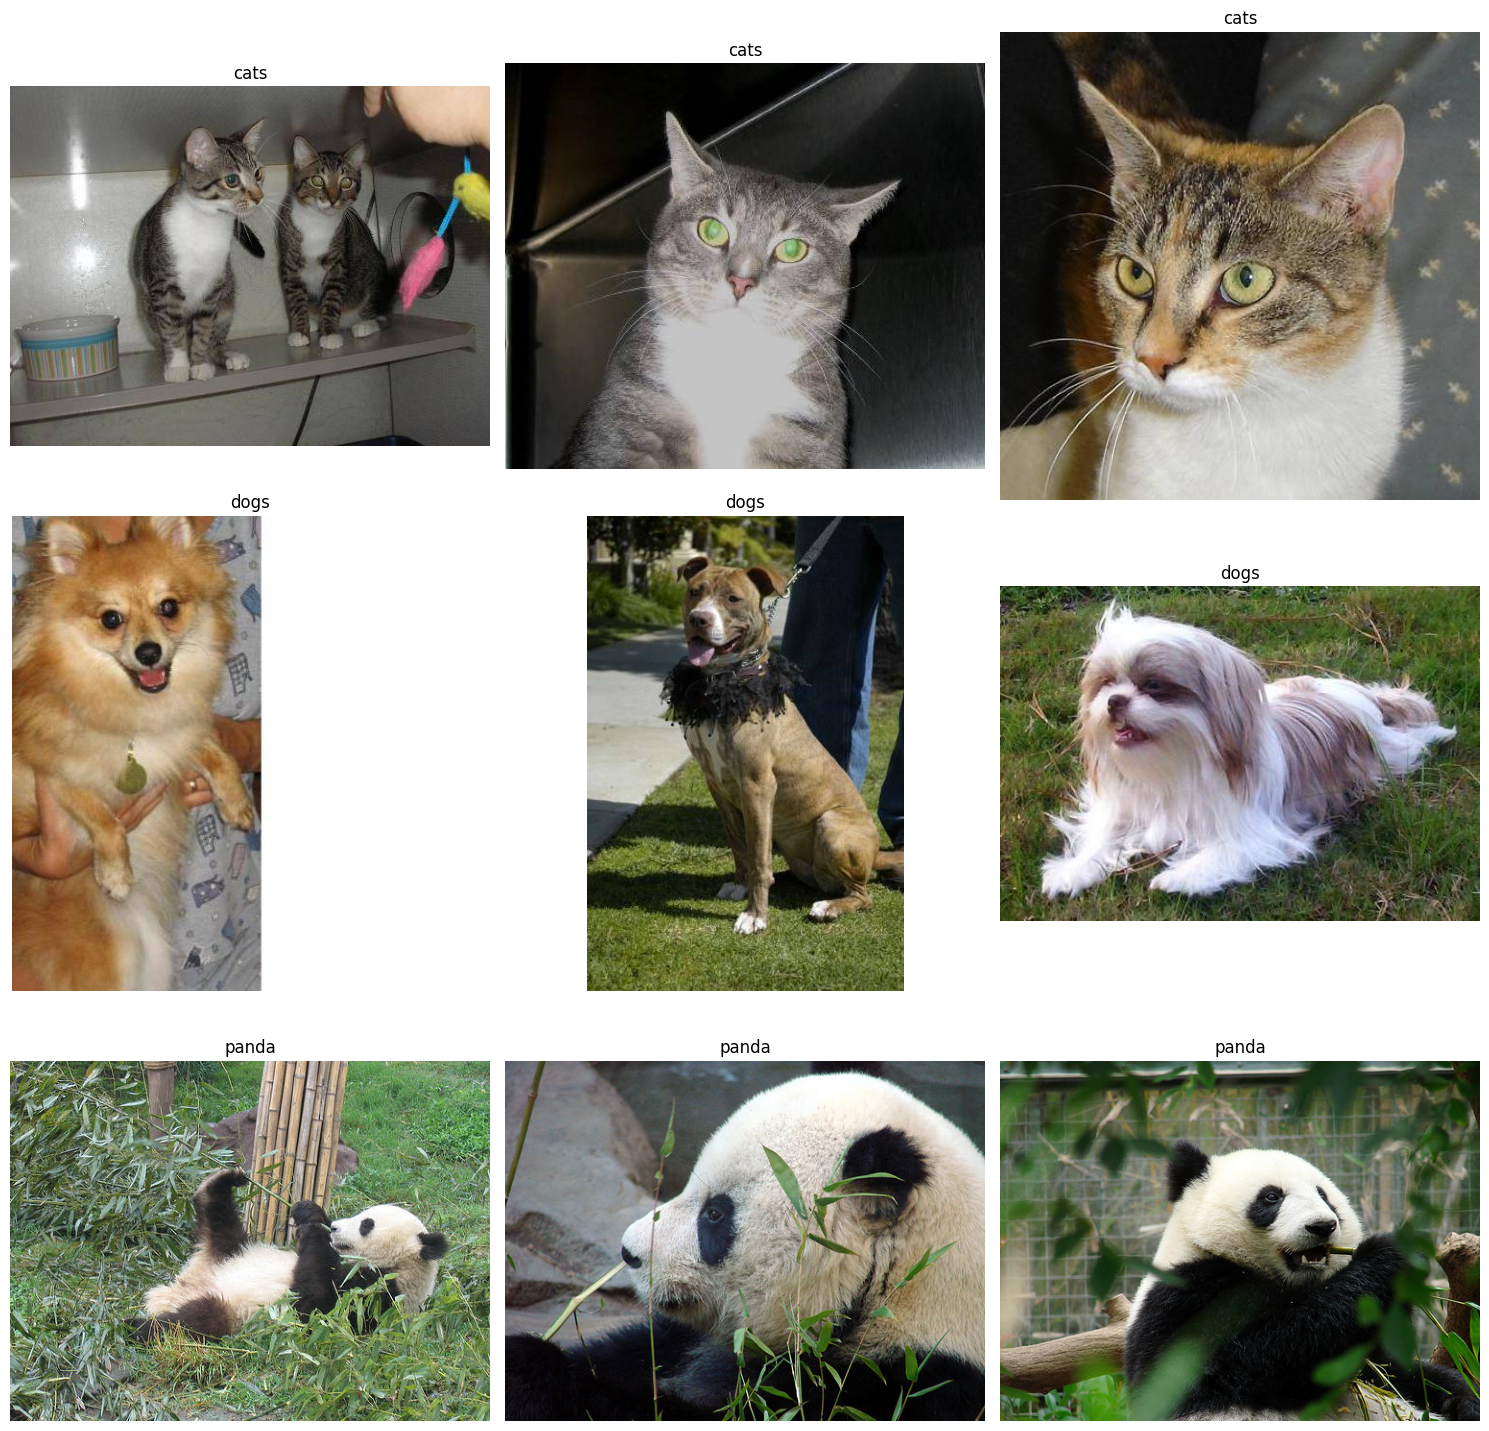

In [5]:
def plot_sample_images(image_paths: List[np.array], labels: List[str], samples_per_class: int = 3):
    """
    Plot a sample of images with their labels using matplotlib.

    Parameters:
    - image_paths: List of image arrays.
    - labels: Corresponding list of labels.
    - samples_per_class: Number of random samples to plot per class. Default is 3.
    """
    
    unique_labels = np.unique(labels)
    selected_indices = []

    # For each unique label, randomly sample the specified number of images
    for label in unique_labels:
        label_indices = np.where(np.array(labels) == label)[0]
        label_sample_indices = np.random.choice(label_indices, samples_per_class, replace=False)
        selected_indices.extend(label_sample_indices)

    # Create a new figure
    plt.figure(figsize=(15, 15))
    
    for i, idx in enumerate(selected_indices):
        plt.subplot(len(unique_labels), samples_per_class, i + 1)
        plt.imshow(cv2.cvtColor(image_paths[idx], cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB
        plt.title(labels[idx])
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Usage:
plot_sample_images(image_paths, labels, samples_per_class=3)
